In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-nyc/AB_NYC_2019.csv


# The given dataset is about AirBNB hotels in particular region in USA. The dataset contains data like hotel name, host name, neighbourhoods, type of room, price etc.

In [36]:
airbnb = pd.read_csv("/kaggle/input/airbnb-nyc/AB_NYC_2019.csv")
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [37]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### There are few columns which are unnecessary right now to analyze and generate insights from the daata. Hence, the first step of cleaning is to remove unncessary columns from the data

In [38]:
airbnb.drop(['id','host_id','latitude','longitude','last_review'], axis=1, inplace=True)
airbnb

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [39]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [54]:
airbnb['Room_Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### The column names are not upto the standard, hence renaming those with approporiate names

In [40]:
new_column_names = {'name':'Hotel_Name','host_name':'Host_Name','neighbourhood_group':'Neighbour_City','neighbourhoob':'Neighbourhood','room_type':'Room_Type','price':'Price','minimum_nights':'Min_Nights','number_of_reviews':'No.of_Reviews','reviews_per_month':'Reviews/Month','calculated_host_listings_count':'Host_count','availability_365':'Availablity(days/year)'}
airbnb = airbnb.rename(columns = new_column_names)
airbnb

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [41]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hotel_Name              48879 non-null  object 
 1   Host_Name               48874 non-null  object 
 2   Neighbour_City          48895 non-null  object 
 3   neighbourhood           48895 non-null  object 
 4   Room_Type               48895 non-null  object 
 5   Price                   48895 non-null  int64  
 6   Min_Nights              48895 non-null  int64  
 7   No.of_Reviews           48895 non-null  int64  
 8   Reviews/Month           38843 non-null  float64
 9   Host_count              48895 non-null  int64  
 10  Availablity(days/year)  48895 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.1+ MB


#### There are null entries in the column 'Reviews/Month'. Hence, replacing them with mean value of the column

In [42]:
rev_mean = airbnb['Reviews/Month'].mean()
airbnb['Reviews/Month'] = airbnb['Reviews/Month'].fillna(rev_mean)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hotel_Name              48879 non-null  object 
 1   Host_Name               48874 non-null  object 
 2   Neighbour_City          48895 non-null  object 
 3   neighbourhood           48895 non-null  object 
 4   Room_Type               48895 non-null  object 
 5   Price                   48895 non-null  int64  
 6   Min_Nights              48895 non-null  int64  
 7   No.of_Reviews           48895 non-null  int64  
 8   Reviews/Month           48895 non-null  float64
 9   Host_count              48895 non-null  int64  
 10  Availablity(days/year)  48895 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.1+ MB


#### There are other columns with few null entries and they are of object type. Since only few are null entries, we will drop the rows with NULL entries

In [43]:
airbnb.dropna(inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hotel_Name              48858 non-null  object 
 1   Host_Name               48858 non-null  object 
 2   Neighbour_City          48858 non-null  object 
 3   neighbourhood           48858 non-null  object 
 4   Room_Type               48858 non-null  object 
 5   Price                   48858 non-null  int64  
 6   Min_Nights              48858 non-null  int64  
 7   No.of_Reviews           48858 non-null  int64  
 8   Reviews/Month           48858 non-null  float64
 9   Host_count              48858 non-null  int64  
 10  Availablity(days/year)  48858 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.5+ MB


In [44]:
airbnb.describe()

,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,152.740309,7.012444,23.273098,1.373228,7.148369,112.801425
std,240.232386,20.019757,44.549898,1.497816,32.964600,131.610962
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Finding the outliers from the numerical data and fixing the data

In [45]:
airbnb[airbnb['Price']>5000]

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
3537,UWS 1BR w/backyard + block from CP,Jay And Liz,Manhattan,Upper West Side,Entire home/apt,6000,14,17,0.270000,1,359
3720,"SuperBowl Penthouse Loft 3,000 sqft",Omri,Manhattan,Little Italy,Entire home/apt,5250,1,0,1.373221,1,0
3774,SUPER BOWL Brooklyn Duplex Apt!!,Jonathan,Brooklyn,Clinton Hill,Entire home/apt,6500,1,0,1.373221,1,0
4377,Film Location,Jessica,Brooklyn,Clinton Hill,Entire home/apt,8000,1,1,0.030000,11,365
6530,Spanish Harlem Apt,Olson,Manhattan,East Harlem,Entire home/apt,9999,5,1,0.020000,1,0
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,Private room,10000,100,2,0.040000,1,0
12342,"Quiet, Clean, Lit @ LES & Chinatown",Amy,Manhattan,Lower East Side,Private room,9999,99,6,0.140000,1,83
15560,Luxury townhouse Greenwich Village,Linda,Manhattan,Greenwich Village,Entire home/apt,6000,1,0,1.373221,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.160000,1,0
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,Entire home/apt,10000,30,0,1.373221,1,83


In [46]:
airbnb[airbnb['Min_Nights']>500]

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
5767,Prime W. Village location 1 bdrm,Genevieve,Manhattan,Greenwich Village,Entire home/apt,180,1250,2,0.030000,1,365
13404,Historic Designer 2 Bed. Apartment,Glenn H.,Manhattan,Harlem,Entire home/apt,99,999,2,0.070000,1,42
26341,Beautiful place in Brooklyn! #2,Angie,Brooklyn,Williamsburg,Private room,79,999,24,1.120000,6,249
38664,Shared Studio (females only),Meg,Manhattan,Greenwich Village,Shared room,110,999,0,1.373221,1,365


In [47]:
airbnb[airbnb['No.of_Reviews']>500]

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Carol,Manhattan,Lower East Side,Private room,99,2,540,6.95,1,179
2015,Private Bedroom in Manhattan,Jj,Manhattan,Harlem,Private room,49,1,594,7.57,3,339
2030,Beautiful Bedroom in Manhattan,Jj,Manhattan,Harlem,Private room,49,1,597,7.72,3,342
2031,Great Bedroom in Manhattan,Jj,Manhattan,Harlem,Private room,49,1,607,7.75,3,293
10623,Steps away from Laguardia airport,Maya,Queens,East Elmhurst,Private room,46,1,543,11.59,5,163
11759,Room near JFK Queen Bed,Dona,Queens,Jamaica,Private room,47,1,629,14.58,2,333
13495,Room Near JFK Twin Beds,Dona,Queens,Jamaica,Private room,47,1,576,13.40,2,173
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Danielle,Queens,East Elmhurst,Private room,48,1,510,16.22,5,341


In [48]:
airbnb[airbnb['Host_count']>15]

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
321,Superior @ Box House,The Box House Hotel,Brooklyn,Greenpoint,Private room,179,3,36,0.360000,28,79
327,Duplex w/ Terrace @ Box House Hotel,The Box House Hotel,Brooklyn,Greenpoint,Private room,349,3,8,0.090000,28,60
328,Loft w/ Terrace @ Box House Hotel,The Box House Hotel,Brooklyn,Greenpoint,Private room,349,3,7,0.070000,28,60
330,Loft w/ Terrace @ Box House Hotel,The Box House Hotel,Brooklyn,Greenpoint,Private room,249,3,2,0.020000,28,60
339,Superior @ Box House,The Box House Hotel,Brooklyn,Greenpoint,Private room,179,3,13,0.140000,28,81
...,...,...,...,...,...,...,...,...,...,...,...
48723,Smart Nolita 1BR w/ W/D near famous cafes by B...,Blueground,Manhattan,Nolita,Entire home/apt,316,30,0,1.373221,232,325
48724,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,Blueground,Manhattan,Hell's Kitchen,Entire home/apt,385,30,0,1.373221,232,338
48725,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,Blueground,Manhattan,Hell's Kitchen,Entire home/apt,267,30,0,1.373221,232,228
48726,Beautiful Williamsburg 2BR w/ Skyline views + ...,Blueground,Brooklyn,Williamsburg,Entire home/apt,278,30,0,1.373221,232,188


In [49]:
airbnb[airbnb['Availablity(days/year)']==0]

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1,0
6,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.400000,1,0
8,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,0.990000,1,0
14,West Village Nest - Superhost,Alina,Manhattan,West Village,Entire home/apt,120,90,27,0.220000,1,0
20,Sweet and Spacious Brooklyn Loft,Chaya,Brooklyn,Williamsburg,Entire home/apt,299,3,9,0.070000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48550,Sunny room with private entrance in shared home,Tiffany,Queens,Ridgewood,Private room,45,1,0,1.373221,1,0
48731,Sunlight charming apt. in the heart of Brooklyn,Luciana Paula,Brooklyn,Park Slope,Entire home/apt,111,8,0,1.373221,1,0
48756,Murray Hill Masterpiece,David,Manhattan,Murray Hill,Entire home/apt,129,2,0,1.373221,1,0
48760,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",Brandon,Queens,Sunnyside,Private room,46,1,0,1.373221,1,0


#### Technically, it's not possible to have Availability as 0 and still able to run the hotel, hence replacing them with mean value of the column

In [50]:
airbnb.loc[airbnb['Availablity(days/year)'] == 0, 'Availablity(days/year)'] = 113
airbnb[airbnb['Availablity(days/year)']==0]

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)


In [51]:
airbnb.describe()

,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,152.740309,7.012444,23.273098,1.373228,7.148369,153.294363
std,240.232386,20.019757,44.549898,1.497816,32.964600,105.460989
min,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,69.000000,1.000000,1.000000,0.280000,1.000000,100.000000
50%,106.000000,3.000000,5.000000,1.220000,1.000000,113.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [52]:
airbnb

,Hotel_Name,Host_Name,Neighbour_City,neighbourhood,Room_Type,Price,Min_Nights,No.of_Reviews,Reviews/Month,Host_count,Availablity(days/year)
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1.373221,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1,113
...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,1.373221,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,40,4,0,1.373221,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1.373221,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,1.373221,6,2


## 1. How many hotels belong to each of the cities given in the dataset?

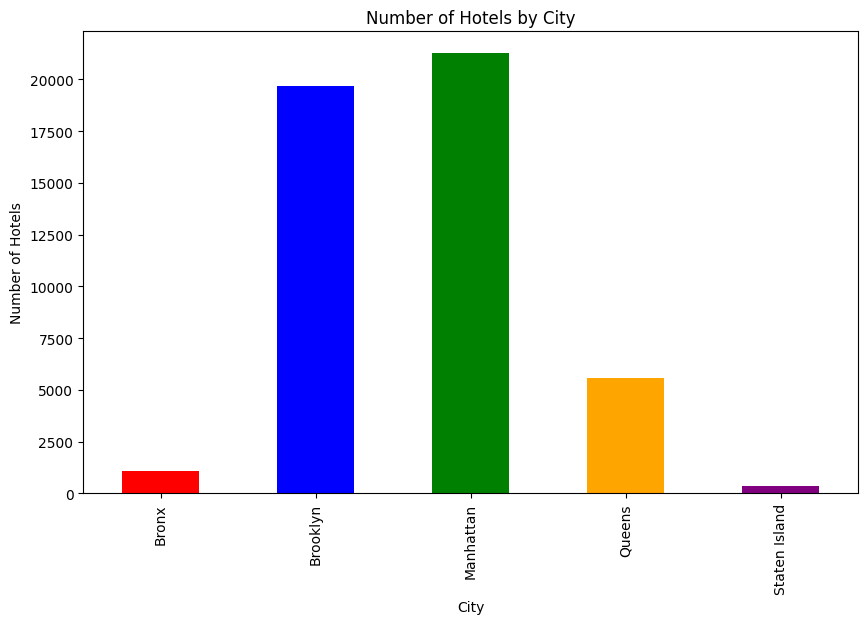

In [53]:
import matplotlib.pyplot as plt

hotel_count = airbnb.groupby('Neighbour_City')['Hotel_Name'].nunique()

# create a list of color codes
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# create a bar chart to visualize the hotel count by city with different colors for each bar
hotel_count.plot(kind='bar', x='Neighbour_City', y='Hotel_Count', figsize=(10, 6), color=colors)
plt.title('Number of Hotels by City')
plt.xlabel('City')
plt.ylabel('Number of Hotels')
plt.show()

#### Manhattan has the highest number of hotels followed by Brooklyn.

## 2. What are the proportions of the type of room available from the dataset? Which is the most preferred room type by the owners?

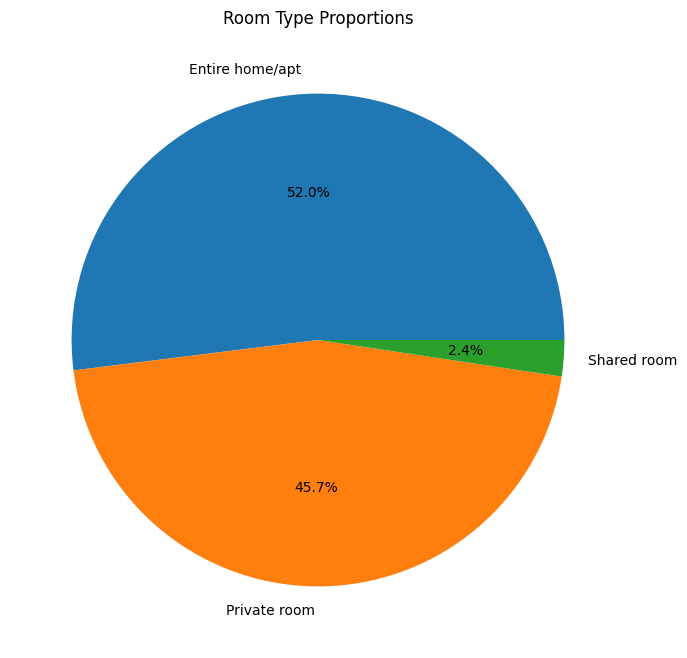

In [55]:
room_type_count = airbnb.groupby('Room_Type').size()

# create a pie chart to visualize the room type proportions
plt.figure(figsize=(8, 8))
plt.pie(room_type_count, labels=room_type_count.index, autopct='%1.1f%%')
plt.title('Room Type Proportions')
plt.show()

#### Entire house/apartment is the most happening type of room followed by Private room